# Week 4 Assignment 5
##### Team 5

### Goal: Select a corpus of choice and analyze high frequency words.

#### 1. Choose a corpus of interest.
The corpus chosen was a collection of quotes from the author Terry Pratchett that can be found here: https://www.lspace.org/books/pqf/

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
# nltk.download("all") # You can manually download from nltk by leaving the parentheses empty
from nltk.book import *

In [2]:
# Loading our quotes corpus
f = open("pqf.txt", "rU")
text = f.read()
terrytext = text.split()
quotes = nltk.Text(terrytext)

In [3]:
# Length
len(quotes)

23487

#### 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
Unique was to be defined as words not in the english dictionary. As such, we were to compare the corpus against a dictionary. To achieve this, we first attempted to import the "words" library from nltk.corpus, however, upon discovering that the words that passed as unique mostly included verbs in past or present tense, we decided to rely more on the dictionary of pronounciations from nltk.corpus, since it included verb tenses. Though the results were not perfect, they were better at removing non-unique words. 

In [29]:
# Cleaning up corpus by removing punctuation and common words
from nltk.corpus import stopwords
quotes = [w for w in quotes if w.isalpha()]
quotes = [w for w in quotes if w not in stopwords.words('english')]

In [50]:
# Unique words from pronounciation syllables
entries = nltk.corpus.cmudict.entries()
entries = [item[0] for item in entries] # Remove pronounciation
len(entries)

133737

In [52]:
# Remove words not found in our pronounciation dictionary
# Because the words weren't made lowercase earlier in the "quotes" list, we do it again to remove common words
sub  = [w.lower() for w in quotes if w not in entries]
sub = [w for w in sub if w not in stopwords.words('english')]

In [61]:
sub[0:9]

['surely', 'people', 'star', 'trek', 'ye', 'cannae', 'oout', 'feegle', 'wee']

In [62]:
len(sub)

1843

#### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?
Since our corpus contained 23,487 words, the number of most common unique words that take 50% of the corpus should be calculate in such a way that summing the count of each of the unique words adds up to approximately 11,744 words. Because the pool of unique words is so small (858 rows), the sum of the words totals is nowhere near 50% of corpus' volume. At best, it is 7%.

In [213]:
topunique = nltk.FreqDist(sub)
topcount = pd.DataFrame(topunique.most_common(), columns=['word','n'])
topcount['relative_frequency'] = (quotes_freq['n']/float(len(quotes)))
topcount.head(10)

,word,n,relative_frequency
0,small,54,0.021594
1,good,53,0.015236
2,pratchett,51,0.010194
3,neil,51,0.008988
4,moving,51,0.008002
5,lords,34,0.007454
6,death,26,0.007454
7,gaspode,24,0.005919
8,men,22,0.005700
9,johnny,21,0.005590


In [90]:
len(topcount)

858

#### 4. Identify the 200 highest frequency words in this corpus.

In [206]:
# Build the frequency distribution table
quotes_freq = nltk.FreqDist(quotes)
quotes_freq = pd.DataFrame(quotes_freq.most_common(200), columns=['word','n'])
quotes_freq['relative_frequency'] = (quotes_freq['n']/float(len(quotes)))
quotes_freq.head(20)

,word,n,relative_frequency
0,The,197,0.021594
1,I,139,0.015236
2,said,93,0.010194
3,one,82,0.008988
4,people,73,0.008002
5,It,68,0.007454
6,like,68,0.007454
7,Small,54,0.005919
8,Good,52,0.005700
9,Moving,51,0.005590


#### 5. Create a graph that shows the relative frequency of these 200 words.
Relative frequency plot of top 200 words

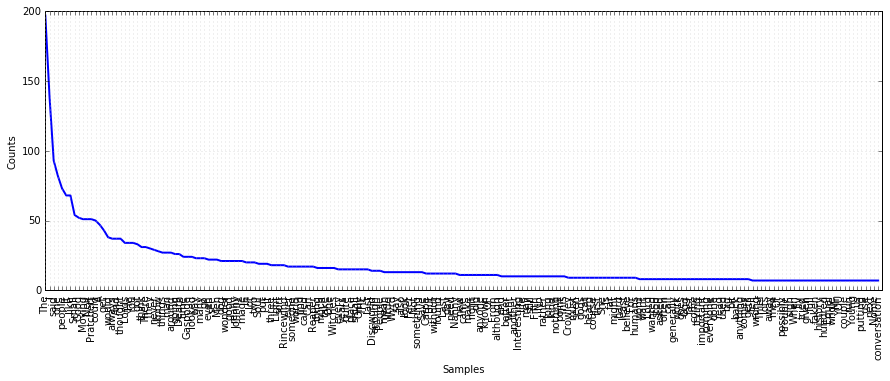

In [108]:
freq_plot = nltk.FreqDist(quotes)
plt.figure(figsize=(15,5))
freq_plot.plot(200)

Frequency histogram of top 200 words, with top ten unique words highlighted in red.

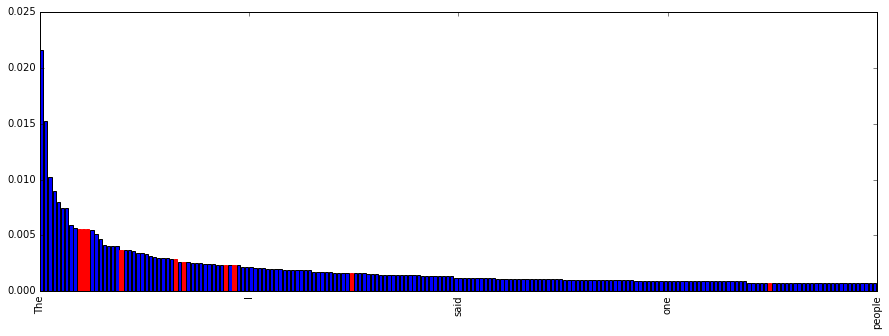

In [261]:
plt.figure(figsize=(15,5))
pos = np.arange(len(quotes_freq))
ax = plt.axes()
ax.set_xticklabels(quotes_freq.word, rotation=90)

freq_hist = plt.bar(pos, quotes_freq.relative_frequency, color='b')
freq_hist[9].set_color('r')
freq_hist[10].set_color('r')
freq_hist[11].set_color('r')
freq_hist[19].set_color('r')
freq_hist[32].set_color('r')
freq_hist[34].set_color('r')
freq_hist[44].set_color('r')
freq_hist[46].set_color('r')
freq_hist[74].set_color('r')
freq_hist[174].set_color('r')

plt.show()

#### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law: given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. Aka, low rank on the frequency table means very frequently used word. The most frequent word will occur approximately twice as often as the second most frequent word, which will occur approximately twice as often as the fourth most frequent word 

#### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Terry Pratchett is an author who plays with both comedy and fantasy. As such, it would not be surprising if words that would have a lower frequency in other corpus have a higher one here. For example, Death pops up more often in this corpus than would probably be expected in another simply because Death in the Discworld series is an important character. In addition, due to the nature of the books, exclamations not heard in even english vernacular may be presented as typical. Words may also be made up entirely and used rather frequently.